# **SVM | RF | KNN – Early Stage Diabetes Risk Prediction**


## Early stage diabetes risk prediction dataset



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading data from CSV

In [ ]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'
names = ['Age', 'Sex', 'Polyuria', 'Polydipsia', 'SuddenWeightLoss', 'Weakness', 'Polyphagia', 'GenitalThrush', 'VisualBlurring', 'Itching', 'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness', 'Alopecia', 'Obesity', 'Class']
dataframe = pd.read_csv(url, names=names, skiprows=1)

In [ ]:
dataframe.head()

,Age,Sex,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Pre-Processing

In [ ]:
# Handle missing values
dataframe.isna().sum()


Age                 0
Sex                 0
Polyuria            0
Polydipsia          0
SuddenWeightLoss    0
Weakness            0
Polyphagia          0
GenitalThrush       0
VisualBlurring      0
Itching             0
Irritability        0
DelayedHealing      0
PartialParesis      0
MuscleStiffness     0
Alopecia            0
Obesity             0
Class               0
dtype: int64

Dataset is clean. There is no missing values therefore, no further processing required to remove or imputate missing data

In [ ]:
for column  in dataframe.iloc[:, 1:].columns:
  print(dataframe[column].unique())

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


In [ ]:
# Handle data types
dataframe.dtypes

Age                  int64
Sex                 object
Polyuria            object
Polydipsia          object
SuddenWeightLoss    object
Weakness            object
Polyphagia          object
GenitalThrush       object
VisualBlurring      object
Itching             object
Irritability        object
DelayedHealing      object
PartialParesis      object
MuscleStiffness     object
Alopecia            object
Obesity             object
Class               object
dtype: object

In [ ]:
# Convert Boolean columns (e.g.: Yes/No) from Object type to Boolean
for columnName  in dataframe.iloc[:,2:16].columns:
  dataframe[columnName] = dataframe[columnName].map({'Yes': True, 'No': False})
  dataframe[columnName] = dataframe[columnName].astype(bool)
dataframe['Sex'] = dataframe['Sex'].map({'Male': True, 'Female': False})
dataframe['Sex'] = dataframe['Sex'].astype(bool)
dataframe['Class'] = dataframe['Class'].map({'Positive': True, 'Negative': False})
dataframe['Class'] = dataframe['Class'].astype(bool)
dataframe.head()

,Age,Sex,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


In [ ]:
for column  in dataframe.iloc[:, 1:].columns:
  print(dataframe[column].unique())
dataframe.dtypes

[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[ True False]
[ True False]
[ True False]


Age                 int64
Sex                  bool
Polyuria             bool
Polydipsia           bool
SuddenWeightLoss     bool
Weakness             bool
Polyphagia           bool
GenitalThrush        bool
VisualBlurring       bool
Itching              bool
Irritability         bool
DelayedHealing       bool
PartialParesis       bool
MuscleStiffness      bool
Alopecia             bool
Obesity              bool
Class                bool
dtype: object

### Split Train and Test set


In [ ]:
# Split the data into features and target
X = dataframe.drop('Class', axis=1)
y = dataframe['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Applying Support Vector Machine (SVM)

First step is to determine best Kernel fuction for given dataset

              precision    recall  f1-score   support

    Positive       0.95      0.93      0.94        40
    Negative       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        40
    Negative       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        40
    Negative       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104

              precision    recall  f1-score   support

    Positive       0.41      0.40      0.41        40
    Negative       0.63      0.64      0.64        64

    accuracy                           0.55       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.55      0.55      0.55       104

Best kernel: linear

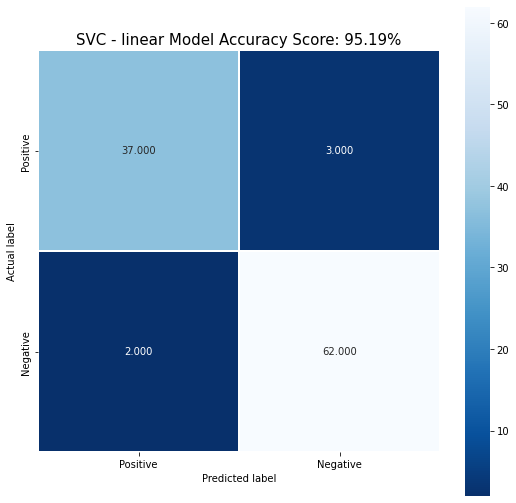

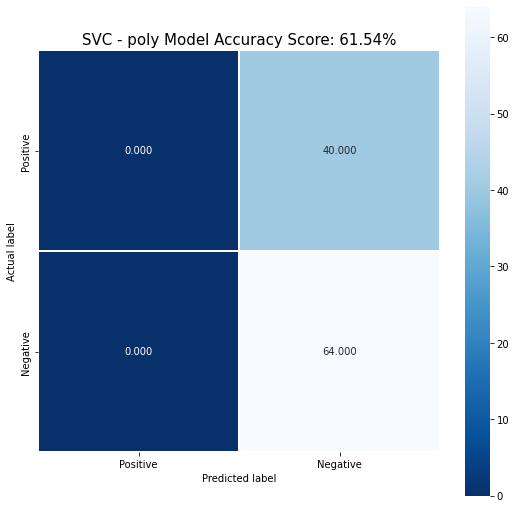

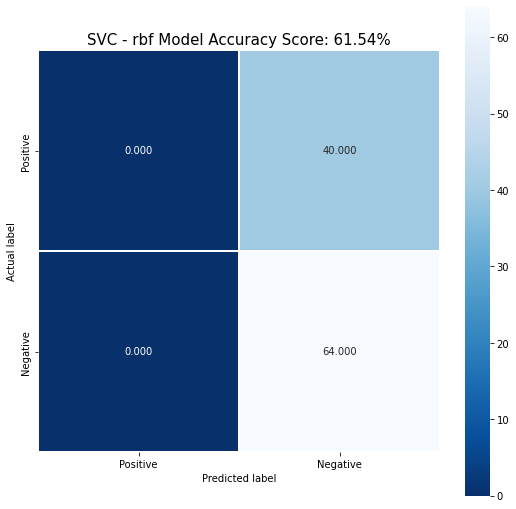

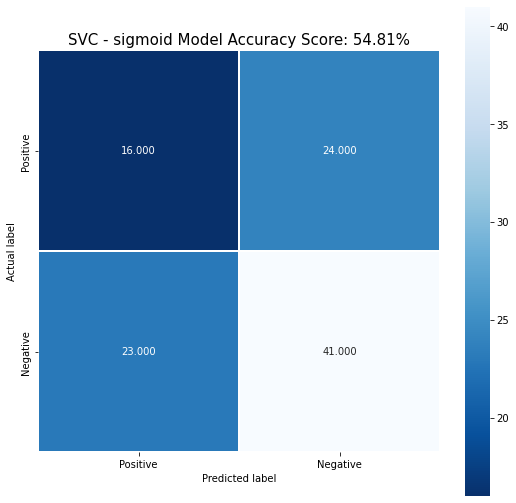

In [ ]:
# List of kernel functions to try
kernels = ["linear", "poly", "rbf", "sigmoid"]
class_names = ["Positive","Negative"]

# Dictionary to store the performance of each SVM classifier
performance = {}

for kernel in kernels:
    # Train an SVM classifier using the current kernel function
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the target values for the testing data
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'SVC - {kernel} Model Accuracy Score: {accuracy:.2%}'
    plt.title(all_sample_title, size = 15)

    print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

    # Store the performance metrics for the current SVM classifier
    performance[kernel] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Find the kernel with the best performance
best_kernel = max(performance, key=lambda x: performance[x]["f1"])

# Print the best kernel and its performance metrics
print("Best kernel: {}".format(best_kernel))
print("Accuracy: {:.2f}".format(performance[best_kernel]["accuracy"]))
print("Precision: {:.2f}".format(performance[best_kernel]["precision"]))
print("Recall: {:.2f}".format(performance[best_kernel]["recall"]))
print("F1-score:{:.2f}".format(performance[best_kernel]["f1"]))





In [ ]:
# Best SVC Kernel is linear with Accuracy: 0.95 Precision: 0.95 Recall: 0.97 F1-score:0.96
# We will use this model for feature selection

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Use SelectFromModel to select the most important features
sfm = SelectFromModel(clf, prefit=True)
new_X_train = sfm.transform(X_train)
selected_features = X_train.columns[sfm.get_support()]
new_X_test = sfm.transform(X_test)

# Print the shape of the new feature matrix to see how many features were retained
print("Number of retained features: {}".format(new_X_train.shape[1]))


# Get the names of the selected features


# Print the names of the selected features
print("Selected features:")
print(selected_features)



Number of retained features: 6
Selected features:
Index(['Sex', 'Polyuria', 'Polydipsia', 'GenitalThrush', 'Itching',
       'Irritability'],
      dtype='object')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

    Positive       0.90      0.95      0.93        40
    Negative       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Accuracy: 94.23%
Precision: 96.77%
Recall: 93.75%
F1-score:95.24%


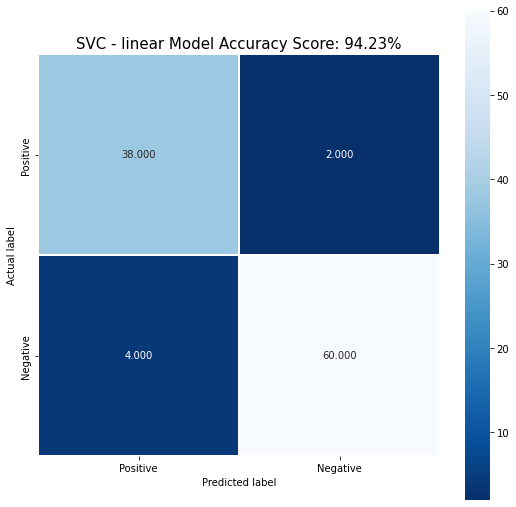

In [ ]:
# Re-run the model with new feature set

clf = SVC(kernel="linear")
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVC - linear Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


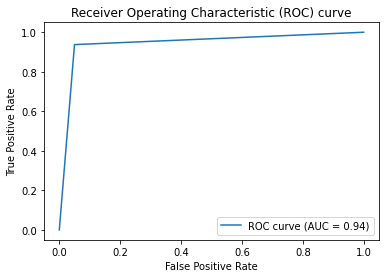

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

## K-Nearest Neighbor (KNN) Implementation

we define a range of hyperparameters to search over, including the number of neighbors (n_neighbors), the weighting scheme (weights), and the value of p for the Minkowski distance metric (p). We use GridSearchCV to search over this range of hyperparameters and find the best hyperparameters that give the highest accuracy on the validation set.

Mean test score: 88.71% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean test score: 90.39% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean test score: 88.47% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean test score: 90.87% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean test score: 87.98% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
Mean test score: 90.87% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
Mean test score: 87.98% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}
Mean test score: 90.87% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'distance'}
Mean test score: 87.98% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}
Mean test score: 90.87% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'distance'}
Mean test score: 85.35% for hyperparameters: {'n_neighb

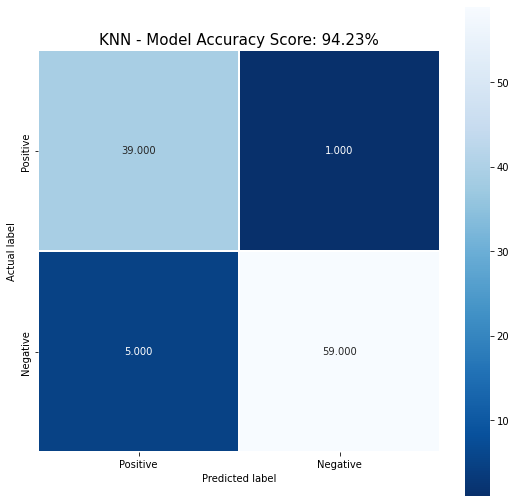

In [ ]:
# Define the range of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5]
}

# Train a KNeighborsClassifier with GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a KNeighborsClassifier using the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


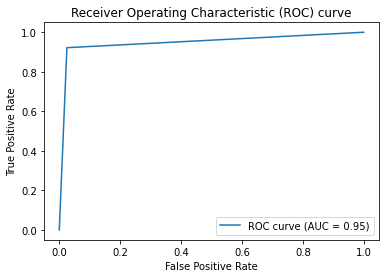

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

              precision    recall  f1-score   support

    Positive       0.95      0.97      0.96        40
    Negative       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

Accuracy: 97.12%
Precision: 98.41%
Recall: 96.88%
F1-score:97.64%


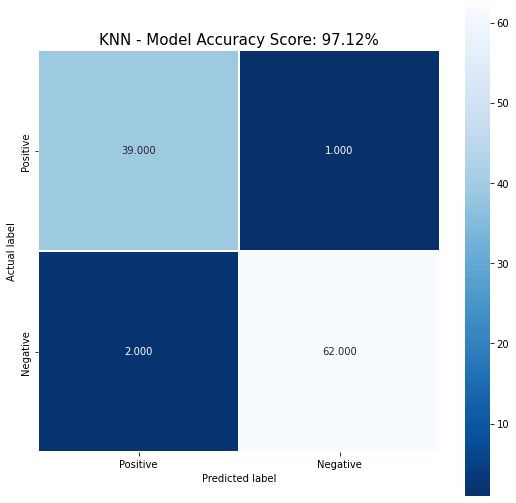

In [ ]:
# Re run the best Hyperparameter model with reduced features

clf = KNeighborsClassifier(**best_params)
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

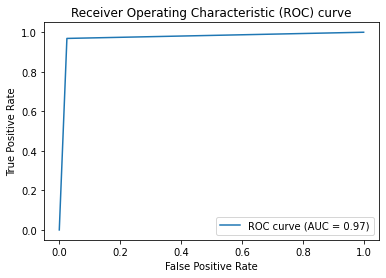

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

## Random Forest classifier Implementation

Following parameters will be used to select optimal configuration for Random forest.

**n_estimators:** This parameter defines the number of trees in the forest. A larger number of trees can result in a more accurate model, but also increases the computational time.

**max_depth**: This parameter sets the maximum depth of each tree in the forest. A deeper tree can capture more complex relationships in the data, but also increases the risk of overfitting.

**min_samples_split**: This parameter sets the minimum number of samples required to split an internal node in a tree. A higher value for this parameter results in more conservative trees, which can help to reduce overfitting.



Mean test score: 89.91% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Mean test score: 90.39% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Mean test score: 89.19% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Mean test score: 89.91% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Mean test score: 88.95% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}
Mean test score: 89.67% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
Mean test score: 89.91% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100}
Mean test score: 89.91% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 200}
Mean test score: 89.43% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}
Mean test score: 92.80% for hyperpara

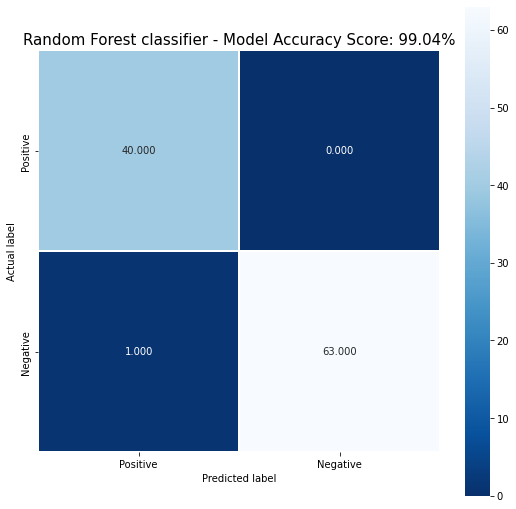

In [ ]:
# Define the hyperparameters to be tuned
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 4, 6]}

# Train a Random Forest classifier with GridSearchCV
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))


# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Predict the target values for the test data
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Random Forest classifier - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

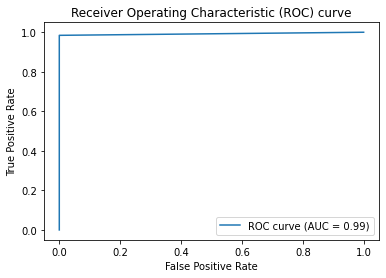

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

              precision    recall  f1-score   support

    Positive       0.93      0.97      0.95        40
    Negative       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

Accuracy: 96.15%
Precision: 98.39%
Recall: 95.31%
F1-score:96.83%


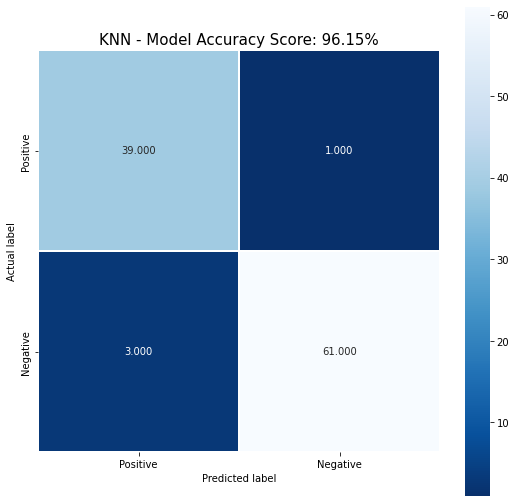

In [ ]:
# Re run the best Hyperparameter model with reduced features

clf = RandomForestClassifier(**best_params)
clf.fit(new_X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(new_X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

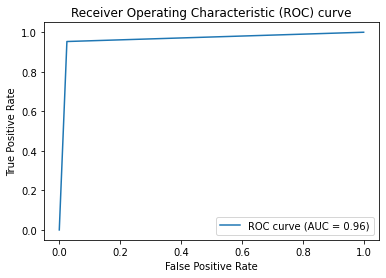

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()